# Import Necessary Modules

In [60]:
from pandas import read_csv, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from random import randint

# Loading the file

In [9]:
file = './Iris.csv'
names = ['id', 'sepal-length', 'sepal-width', 'petal-length', 'petal-wdith', 'outcome']
data_iris = read_csv(file,
                    names = names,
                    index_col = 'id',
                    header = 0)

# Dataset Characteristics

In [ ]:
# Dataset Dimensions
print(f'Dataset Size: {data_iris.shape}')

# First 10 Entries
print(f'First 10 Entries:\n {data_iris.head(10)}')

# Last 10 Entries
print(f'Last 10 Entries:\n {data_iris.tail(10)}')

# Unique Attributes
data_iris['outcome'].unique()

# Class Distribution
data_iris.groupby('outcome').size()

## Simple Statistics

In [23]:
# describe() method to generate the count, mean, SD, and percentiles
data_iris.describe()

# skewness
data_iris.skew()

sepal-length    0.314911
sepal-width     0.334053
petal-length   -0.274464
petal-wdith    -0.104997
dtype: float64

## Data Distribution

In [ ]:
# make a deep copy
features = data_iris.copy()
# remove specified column
features.drop(columns=['outcome'], inplace=True)
# boxplot
features.boxplot(vert=False)
# histogram
features.hist()
# density plot
features.plot(kind='density', subplots=True, layout=(2,2), sharex=False)

## Data Correlation

In [ ]:
data_corr = features.corr(method='pearson')
print(data_corr)
# plotting the correlation matrix
heatmap = sns.heatmap(data_corr,
                    mask=np.triu(np.ones_like(data_corr, dtype=np.bool)),
                    vmin=-1, vmax=1,
                    annot=True,
                    cmap='BrBG')
# scatter plot
sns.pairplot(features, diag_kind='hist')
# plot the distribution by outcome
sns.pairplot(data_iris, hue='outcome')

# Data Preparation / Pre-processing
After studying the charasteristics of the dataset, this step prepares it for modelling.
* Changing Data Encoding
* Data Transformation
* Splitting Dataset into Training and Validation Data

## Encoding

### Label Encoding

In [52]:
# Changing Data Encoding
## Uses the LabelEncoder() method from sklearn to translate categories of a feature into a numerical value
encoder = preprocessing.LabelEncoder()          # Instantiate the Label Encoder
encoder.fit(data_iris['outcome'].unique())      # Fit the encoder with the outcome variables

# testing the encoder
test_labels = data_iris['outcome'].unique()
encoded_values = encoder.transform(test_labels)
print('Labels:', test_labels)
print('Encoded values:', list(encoded_values))

# inversely, getting the outcome class by using encoded values
test_encoded_values = [2,0,2,1]
decoded_values = encoder.inverse_transform(test_encoded_values)
print("Test encoded values:", test_encoded_values)
print('Decoded values:', decoded_values)

Labels: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Encoded values: [0, 1, 2]
Test encoded values: [2, 0, 2, 1]
Decoded values: ['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor']


In [54]:
# encoding the 'outcome' column in data_iris
data_iris['outcome'] = encoder.transform(data_iris['outcome'])
data_iris

,sepal-length,sepal-width,petal-length,petal-wdith,outcome
id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2


### One Hot Encoder
This type of encoder is used when there are multi-categorical features that have nominal categories. One-Hot Encoding transforms a feature with n categories into n columns populated by ones and zeros.

In [72]:
colors = ['Red', 'Blue', 'Green', 'Yellow', 'Orange']
data_color = DataFrame([colors[randint(0,4)] for x in range(50)], columns=['color'])
data_color.head(10)

,color
0,Orange
1,Orange
2,Blue
3,Orange
4,Yellow
5,Blue
6,Orange
7,Green
8,Red
9,Blue


In [73]:
onehot_encoder = preprocessing.OneHotEncoder()
encoded_color = DataFrame(onehot_encoder.fit_transform(data_color).toarray(),
                            columns=onehot_encoder.get_feature_names())             # access encoder column name order
print(encoded_color)

    x0_Blue  x0_Green  x0_Orange  x0_Red  x0_Yellow
0       0.0       0.0        1.0     0.0        0.0
1       0.0       0.0        1.0     0.0        0.0
2       1.0       0.0        0.0     0.0        0.0
3       0.0       0.0        1.0     0.0        0.0
4       0.0       0.0        0.0     0.0        1.0
5       1.0       0.0        0.0     0.0        0.0
6       0.0       0.0        1.0     0.0        0.0
7       0.0       1.0        0.0     0.0        0.0
8       0.0       0.0        0.0     1.0        0.0
9       1.0       0.0        0.0     0.0        0.0
10      0.0       0.0        1.0     0.0        0.0
11      1.0       0.0        0.0     0.0        0.0
12      0.0       0.0        0.0     1.0        0.0
13      0.0       1.0        0.0     0.0        0.0
14      0.0       0.0        0.0     0.0        1.0
15      0.0       0.0        0.0     1.0        0.0
16      1.0       0.0        0.0     0.0        0.0
17      0.0       0.0        0.0     0.0        1.0
18      1.0 

## Data Transformation

### Scaling
This example uses MinMaxScaler() from Scikit-learn

In [87]:
# Create a 2D list of random integers
arr = [ [randint(0,100), randint(0,100), randint(0,100), randint(0,100)] for i in range(5)]

data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))       #instantiate scaler
data_rescaled = data_scaler.fit_transform(arr)

print('Original Data:\n', arr)
print('Rescaled Data:\n', data_rescaled)

Original Data:
 [[16, 61, 12, 79], [45, 45, 38, 63], [9, 76, 41, 11], [85, 86, 10, 69], [5, 10, 24, 37]]
Rescaled Data:
 [[0.1375     0.67105263 0.06451613 1.        ]
 [0.5        0.46052632 0.90322581 0.76470588]
 [0.05       0.86842105 1.         0.        ]
 [1.         1.         0.         0.85294118]
 [0.         0.         0.4516129  0.38235294]]


### Standardization
The distribution of each feature is another characteristic that affects the efefctivity of machine learning models. Some machine learning models like Linear Regression and Logistic Regression require that the features follows a standard Gaussian distribution. (mean=0 && std_dev=1)
This example uses StandardScaler() from Scikit-learn.

C:\Users\james\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\james\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

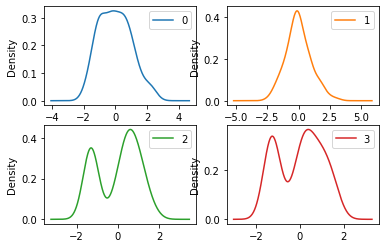

In [91]:
data_scaler1 = preprocessing.StandardScaler().fit(features)
data_rescaled1 = DataFrame(data_scaler1.transform(features))
data_rescaled1.plot(kind='density', subplots=True, layout=(2,2), sharex=False)

### Feature Selection

#### Univariate Selection
This method selects features that have the strongest relationship with the outcome.This example uses the SelectKBest() function from Scikit-learn.

In [94]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=2)            # select 2 features using chi2
fit = selector.fit(features, data_iris['outcome'])      # fit data into selector
print(fit.scores_)                                      # higher scores are better

print(features.columns)
print(fit.get_support(indices=False))                   # shows the mask for the features (true means feature was selected)

featured_data = fit.transform(features)                 # removes unnecessary columns

[ 10.81782088   3.59449902 116.16984746  67.24482759]
Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-wdith'], dtype='object')
[False False  True  True]


### Principal Component Analysis (PCA)
This uses linear algebra to transform a given dataset into a more compressed form (reduced number of features).

This example uses PCA() method from Scikit-learn.

In [95]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
fit = pca.fit(features)
print('Explained Variance:', fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.92461621 0.05301557 0.01718514]
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]]


<ipython-input-96-a925fd2f383f>:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=elevation, azim=azimuthal)


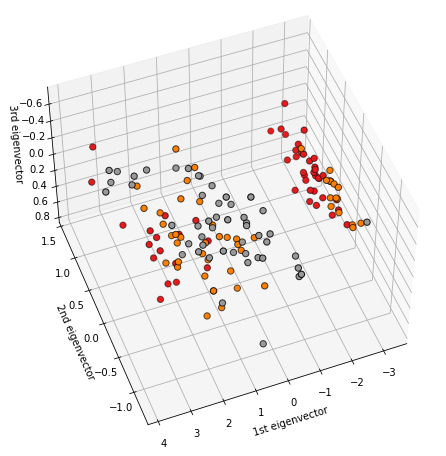

In [96]:
from mpl_toolkits.mplot3d import Axes3D

X_reduced = pca.transform(features)

elevation = -130  #@param {type: "slider", min: -360, max: 360}
azimuthal = 111  #@param {type: "slider", min: -360, max: 360}

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=elevation, azim=azimuthal)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=data_iris['outcome'], cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")
plt.show()

## Splitting Data into (1)Training and (2)Validation Data

In [99]:
from sklearn.model_selection import train_test_split

valid_data = 0.20   #percentage of valid data

X_train, X_valid, Y_train, Y_valid = train_test_split(features,
                                                        data_iris['outcome'],
                                                        test_size=valid_data,
                                                        random_state=1)

print(X_train.describe())
print(X_valid.describe())                                                        

       sepal-length  sepal-width  petal-length  petal-wdith
count    120.000000   120.000000    120.000000   120.000000
mean       5.838333     3.015000      3.810833     1.218333
std        0.832752     0.417002      1.770951     0.777843
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.125000     1.800000
max        7.700000     4.400000      6.900000     2.500000
       sepal-length  sepal-width  petal-length  petal-wdith
count     30.000000    30.000000     30.000000    30.000000
mean       5.863333     3.210000      3.550000     1.120000
std        0.822730     0.470033      1.751994     0.708276
min        4.400000     2.500000      1.200000     0.200000
25%        5.400000     2.925000      1.525000     0.400000
50%        5.650000     3.200000      4.300000     1.250000
75%        6.375000     3.475000      4.

# Data Modeling

### Training Models and Making Predictions
This particular example uses support vector machines through SVC() from sklearn

In [100]:
from sklearn.svm import SVC

# make the model using the training set
model_SVC = SVC(gamma='auto')
model_SVC.fit(X_train, Y_train)

SVC(gamma='auto')

In [103]:
# make prediction using the validation set
Y_pred = model_SVC.predict(X_valid)
print(Y_pred)

# decoding this data
Y_pred_decoded = encoder.inverse_transform(Y_pred)
print(Y_pred_decoded)

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2]
['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']


# Saving the Model

In [105]:
import pickle

filename = 'model_SVC.sav'
pickle.dump(model_SVC, open(filename, 'wb'))

loaded_model_SVC = pickle.load(open(filename, 'rb'))    # load the pickled model
Y_pred_pickle = loaded_model_SVC.predict(X_valid)
print(Y_pred_pickle)
print(Y_pred)

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2]
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2]


# Cross Validation
To determine the validity of the model

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

folds = 10  #@param {type: "slider", min: 1, max: 10}
kfold = StratifiedKFold(n_splits=folds,                        # set the number of folds to 10
                        random_state=1, 
                        shuffle=True)  
cv_results = cross_val_score(model_SVC, X_train, Y_train, 
                             cv=kfold,                      # 
                             scoring='accuracy')            # set accuracy as metric
print('Fold Accuracies:', cv_results)
print('Mean Accuracy:',cv_results.mean())
print('Standard Deviation:', cv_results.std())

Fold Accuracies: [1.         1.         1.         1.         0.91666667 1.
 1.         1.         0.91666667 1.        ]
Mean Accuracy: 0.9833333333333332
Standard Deviation: 0.03333333333333335


# Performance Metrics
Use validation data to see how the model performs on newly seen data. Previous predictions can be compared to the expected results of the validation data.

In [107]:
# Accuracy Score

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_valid, Y_pred))

0.9666666666666667


In [109]:
# Balanced Accuracy Score for multi-class dataset

from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(Y_valid, Y_pred))

0.9743589743589745


[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


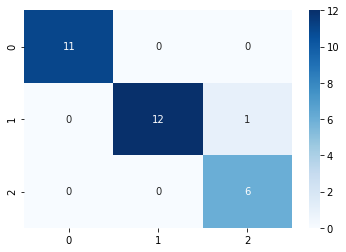

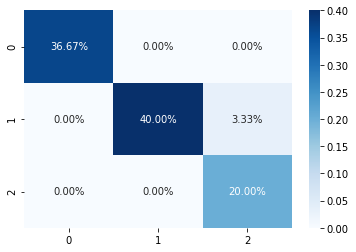

In [112]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cf_result = confusion_matrix(Y_valid, Y_pred)
print(cf_result)

sns.heatmap(cf_result, annot=True, cmap='Blues', cbar='False')
plt.show()

sns.heatmap(cf_result/np.sum(cf_result), # compute for percentage
            annot=True, 
            fmt='.2%', 
            cmap='Blues', cbar='False')
plt.show()

In [113]:
# Classification Report

from sklearn.metrics import classification_report
print(classification_report(Y_valid, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

